## Exercise

### Exercise 1

You've been hired by a shipping company to overhaul the way they route mail, parcels and packages. They want to build an image recognition system  capable of recognizing the digits in the zipcode on a package, so that it can be automatically routed to the correct location.
You are tasked to build the digit recognition system. Luckily, you can rely on the MNIST dataset for the initial training of your model!

Build a deep convolutional Neural Network with at least two convolutional and two pooling layers before the fully connected layer:

- start from the network we have just built
- insert one more `Conv2D`, `MaxPooling2D` and `Activation` pancake, you will have to choose the number of filters in this convolutional layer
- retrain the model
- does performance improve?
- how many parameters does this new model have? More or less than the previous model? Why?
- how long did this second model take to train? Longer or shorter than the previous model? Why?
- did it perform better or worse than the previous model?

In [147]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1),
                 kernel_initializer='normal'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1),
                 kernel_initializer='normal'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_35 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                51264     
__________

In [148]:
h = model2.fit(X_train_t, y_train_cat, batch_size=128,
              epochs=5, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 13s 316us/step - loss: 0.3134 - acc: 0.9072 - val_loss: 0.1428 - val_acc: 0.9536
Epoch 2/5
42000/42000 [==============================] - 14s 329us/step - loss: 0.0889 - acc: 0.9731 - val_loss: 0.1037 - val_acc: 0.9682
Epoch 3/5
42000/42000 [==============================] - 14s 344us/step - loss: 0.0592 - acc: 0.9814 - val_loss: 0.0672 - val_acc: 0.9791
Epoch 4/5
42000/42000 [==============================] - 15s 350us/step - loss: 0.0449 - acc: 0.9861 - val_loss: 0.0860 - val_acc: 0.9735
Epoch 5/5
42000/42000 [==============================] - 15s 347us/step - loss: 0.0347 - acc: 0.9898 - val_loss: 0.0548 - val_acc: 0.9839


In [149]:
train_acc = model2.evaluate(X_train_t, y_train_cat,
                           verbose=0)[1]
test_acc = model2.evaluate(X_test_t, y_test_cat,
                          verbose=0)[1]

print("Train accuracy: {:0.4f}".format(train_acc))
print("Test accuracy: {:0.4f}".format(test_acc))

Train accuracy: 0.9892
Test accuracy: 0.9868


### Exercise 2

Pleased with your performance with the digits recognition task, your boss decides to challenge you with a harder task. Their online branch allows people to upload images to a website that generates and prints a postcard that is shipped to destination. Your boss would like to know what images people are loading on the site in order to provide targeted advertising on the same page, so he asks you to build an image recognition system capable of recognizing a few objects. Luckily for you, there's a dataset ready made with a collection of labeled images. This is the [Cifar 10 Dataset](http://www.cs.toronto.edu/~kriz/cifar.html), a very famous dataset that contains images for 10 different categories:

- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

In this exercise we will reach the limit of what you can achieve on your laptop. In later chapters we will learn how to leverage GPUs to speed up training.

Here's what you have to do:
- load the cifar10 dataset using `keras.datasets.cifar10.load_data()`
- display a few images, see how hard/easy it is for you to recognize an object with such low resolution
- check the shape of `X_train`, does it need reshape?
- check the scale of `X_train`, does it need rescaling?
- check the shape of `y_train`, does it need reshape?
- build a model with the following architecture, and choose the parameters and activation functions for each of the layers:
    - conv2d
    - conv2d
    - maxpool
    - conv2d
    - conv2d
    - maxpool
    - flatten
    - dense
    - output
- compile the model and check the number of parameters
- attempt to train the model with the optimizer of your choice. How fast does training proceed?
- If training is too slow, feel free to stop it and read ahead. In the next chapters you'll learn how to use GPUs to 

In [113]:
from keras.datasets import cifar10

In [114]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 57s 0us/step


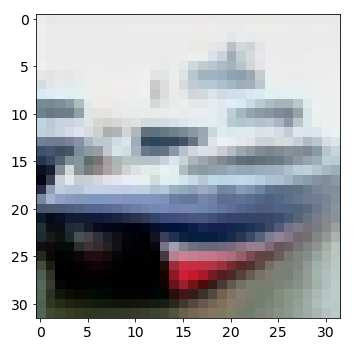

In [116]:
#(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
plt.imshow(X_test[1], cmap='gray')

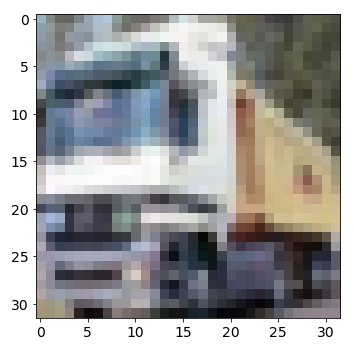

In [117]:
plt.imshow(X_train[1], cmap='gray')

In [182]:
X_train.shape

(50000, 32, 32, 3)

In [152]:
X_test.shape

(10000, 32, 32, 3)

In [194]:
y_train.shape

(50000, 1)

In [162]:
X_train_flat = X_train.reshape((50000, 1024,3))
X_test_flat = X_test.reshape((10000, 1024,3))

In [238]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),
                 kernel_initializer='normal'))
model3.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),
                 kernel_initializer='normal'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),
                 kernel_initializer='normal'))
model3.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),
                 kernel_initializer='normal'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))

# model3.add(Activation('relu'))
# model3.add(MaxPooling2D(pool_size=(2,2)))
# model3.add(Activation('relu'))
# model3.add(Flatten())
# model3.add(Dense(64, activation='relu'))
# model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 800)               0         
__________

In [239]:
len(X_train_flat)

50000

In [240]:
len(y_train)

50000

In [241]:
X_train_flat_n= X_train_flat / 255.0
X_test_flat_n=X_test_flat / 255.0

In [242]:
X_train_flat_n.shape

(50000, 1024, 3)

In [243]:
X_train_t = X_train_flat_n.reshape(-3, 32, 32, 3)
X_test_t = X_test_flat_n.reshape(-3, 32, 32, 3)

In [244]:
X_train_t.shape

(50000, 32, 32, 3)

In [245]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [246]:
y_train_cat.shape

(50000, 10)

In [ ]:
h = model3.fit(X_train_t, y_train_cat, batch_size=128,
              epochs=5, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 65s 2ms/step - loss: 1.7591 - acc: 0.3667 - val_loss: 1.5664 - val_acc: 0.4522
Epoch 2/5
35000/35000 [==============================] - 66s 2ms/step - loss: 1.3711 - acc: 0.5179 - val_loss: 1.3351 - val_acc: 0.5341
Epoch 3/5
35000/35000 [==============================] - 72s 2ms/step - loss: 1.1873 - acc: 0.5881 - val_loss: 1.1871 - val_acc: 0.5849
Epoch 4/5
35000/35000 [==============================] - 80s 2ms/step - loss: 1.0824 - acc: 0.6252 - val_loss: 1.2686 - val_acc: 0.5686
Epoch 5/5
34944/35000 [============================>.] - ETA: 0s - loss: 0.9976 - acc: 0.6560

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
train_acc = model3.evaluate(X_train_t, y_train_cat,
                           verbose=0)[1]
test_acc = model3.evaluate(X_test_t, y_test_cat,
                          verbose=0)[1]

print("Train accuracy: {:0.4f}".format(train_acc))
print("Test accuracy: {:0.4f}".format(test_acc))